La regresión logística es un modelo estadístico utilizado para predecir el resultado de una variable dependiente categórica basada en una o más variables independientes. Aunque su nombre sugiere una relación con la regresión lineal, la regresión logística se utiliza principalmente para tareas de clasificación binaria (sí/no, verdadero/falso, éxito/fracaso) y no para predecir valores continuos.

### Fundamentos de la Regresión Logística

1. *Modelo de Clasificación*: La regresión logística estima la probabilidad de que una observación pertenezca a una de las dos clases posibles. La salida del modelo es una probabilidad que luego se convierte en una predicción de clase mediante un umbral (generalmente 0.5).

2. *Función Sigmoide*: El modelo de regresión logística utiliza una función sigmoide (o logística) para mapear cualquier valor real a un valor entre 0 y 1, que puede interpretarse como una probabilidad. La función sigmoide se define como:
   \[
   \sigma(z) = \frac{1}{1 + e^{-z}}
   \]
   donde \(z\) es una combinación lineal de los valores de entrada (características) ponderados por los coeficientes del modelo.

3. *Función de Costo*: En lugar de minimizar el error cuadrático medio como en la regresión lineal, la regresión logística utiliza una función de costo llamada "log-loss" o "entropía cruzada" para medir el error del modelo. Esta función es adecuada para problemas de clasificación y penaliza fuertemente las predicciones incorrectas con alta confianza.

### Proceso de la Regresión Logística

1. *Cálculo de la Combinación Lineal*: 
   \[
   z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
   \]
   donde \(\beta_0\) es el término de intercepción (bias) y \(\beta_i\) son los coeficientes asociados a cada característica \(x_i\).

2. *Aplicación de la Función Sigmoide*:
 
   \(\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}\)
   La salida \(\hat{y}\) es la probabilidad de que la observación pertenezca a la clase positiva (por ejemplo, 1).

3. *Predicción de Clase*: 
   \[
   \text{Clase Predicha} = 
   \begin{cases} 
   1 & \text{si } \hat{y} \geq 0.5 \\
   0 & \text{si } \hat{y} < 0.5 
   \end{cases}
   \]
   El umbral de 0.5 es el más común, pero puede ajustarse según el problema y las necesidades específicas.

### Ejemplo Intuitivo

Supongamos que estamos tratando de predecir si un estudiante pasará o no un examen basado en el número de horas que ha estudiado y si asistió a una clase preparatoria. Las características serían:

- \(x_1\): Número de horas de estudio
- \(x_2\): Asistencia a clase preparatoria (0 para no, 1 para sí)

La combinación lineal podría ser:
\[
z = \beta_0 + \beta_1 \cdot (\text{horas de estudio}) + \beta_2 \cdot (\text{asistencia})
\]

Aplicamos la función sigmoide para obtener una probabilidad:
\[
\hat{y} = \frac{1}{1 + e^{-z}}
\]

Si \(\hat{y} \geq 0.5\), predecimos que el estudiante pasará el examen; de lo contrario, predecimos que no lo pasará.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

clientes=pd.read_csv('C:/Users/jhinn/OneDrive/Desktop/especializacion/Curso Machine learning/Librerio scikit-learn/Regresión logistica/creditos.csv')

In [2]:
clientes

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


In [3]:
buenos=clientes[clientes['cumplio']==1]
malos=clientes[clientes['cumplio']==0]
buenos

,edad,credito,cumplio
1,19,477965,1
6,23,583565,1
7,24,100000,1
8,24,199272,1
13,25,195341,1
...,...,...,...
187,51,354045,1
188,51,379188,1
189,51,396544,1
190,52,100000,1


In [4]:
malos

,edad,credito,cumplio
0,18,363112,0
2,20,239072,0
3,22,195265,0
4,22,482174,0
5,23,468815,0
9,24,246195,0
10,24,433444,0
11,25,100000,0
12,25,161474,0
40,28,432323,0


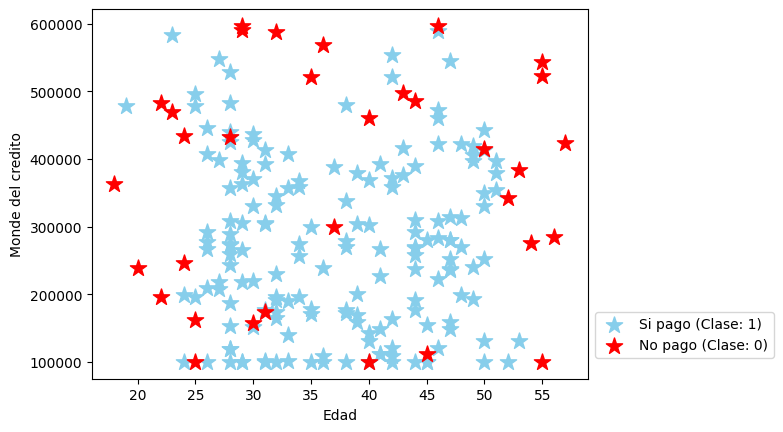

In [5]:
plt.scatter(buenos['edad'],buenos['credito'],marker='*',s=150,color='skyblue',label='Si pago (Clase: 1)')
plt.scatter(malos['edad'],malos['credito'],marker='*',s=150,color='red',label='No pago (Clase: 0)')

plt.ylabel('Monde del credito')
plt.xlabel('Edad')
plt.legend(bbox_to_anchor=(1,0.2))
plt.show()

In [6]:
X= clientes[['edad','credito']].to_numpy()#clientes.loc[:,['edad','credito']]  
Y=clientes['cumplio'].to_numpy()
Y

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [7]:
X

array([[    18, 363112],
       [    19, 477965],
       [    20, 239072],
       [    22, 195265],
       [    22, 482174],
       [    23, 468815],
       [    23, 583565],
       [    24, 100000],
       [    24, 199272],
       [    24, 246195],
       [    24, 433444],
       [    25, 100000],
       [    25, 161474],
       [    25, 195341],
       [    25, 478193],
       [    25, 495793],
       [    26, 100000],
       [    26, 208607],
       [    26, 266805],
       [    26, 276709],
       [    26, 291895],
       [    26, 407631],
       [    26, 445160],
       [    27, 207623],
       [    27, 218257],
       [    27, 398762],
       [    27, 547383],
       [    28, 100000],
       [    28, 118958],
       [    28, 119397],
       [    28, 153643],
       [    28, 187467],
       [    28, 243406],
       [    28, 259973],
       [    28, 273124],
       [    28, 274833],
       [    28, 289173],
       [    28, 308992],
       [    28, 357345],
       [    28, 424449],


In [8]:
from sklearn.model_selection import train_test_split


x_tr, x_ts, y_tr, y_ts = train_test_split(X, Y,
                                                test_size=0.2,
                                                random_state=23)
print(x_tr.shape, y_tr.shape)
print(x_ts.shape, y_ts.shape)

(160, 2) (160,)
(40, 2) (40,)


In [9]:
escalador=preprocessing.MinMaxScaler()

x_tr_s=escalador.fit_transform(x_tr)


In [10]:
x_ts_s=escalador.transform(x_ts)

In [11]:
clasificador=LogisticRegression(max_iter=200)

clasificador.fit(x_tr_s,y_tr)

LogisticRegression(max_iter=200)

In [12]:
y_pred=clasificador.predict(x_ts_s)

In [13]:
nuevo_ejemplo = np.array([[30, 500200]])
nuevo_escalado = escalador.transform(nuevo_ejemplo)

In [19]:
#  predicción
predicted_class = clasificador.predict(nuevo_escalado)
probailidad_prediccion = clasificador.predict_proba(nuevo_escalado)

print(f'Clase Predicha: {predicted_class}')
print(f'Probabilidades: {probailidad_prediccion}')

Clase Predicha: [1]
Probabilidades: [[0.28821442 0.71178558]]


In [15]:
accuracy_score=accuracy_score(y_ts,y_pred)
accuracy_score

0.875

In [16]:
reporte=classification_report(y_ts,y_pred)

c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [17]:
conf_matrix=confusion_matrix(y_ts,y_pred)

In [18]:
print('Exactitud del modelo:', accuracy_score)
print('\nReporte de clasifiacion:\n',reporte)
print('\n Matriz de confucion:\n',
      conf_matrix)

Exactitud del modelo: 0.875

Reporte de clasifiacion:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.88      1.00      0.93        35

    accuracy                           0.88        40
   macro avg       0.44      0.50      0.47        40
weighted avg       0.77      0.88      0.82        40


 Matriz de confucion:
 [[ 0  5]
 [ 0 35]]
